## 데이터 선정 배경 및 진행 방법

* 머신러닝 학습을 위해 간단한 데이터 선정. 다른 여러가지 데이터들도 고려해보았으나 아직은 기술 습득이 완벽치 않아 일정한 features를 가진 targets을 설정해 예측할 수 있는 mushrooms데이터를 선택해 실습.

* inflearn 시간에 배운 ML기법을 활용하여 학습

* 모든 변수가 범주형이므로 one-hot encoding을 하고 교차검증을 통해 정확도를 비교해보고 오차행렬을 통해 정밀도, 재현율, F1, ROC-AUC score들을 비교


### 예상 결과

* 독버섯과 식용버섯의 특징이 비교적 명확하다면 높은 정확도로 식용 버섯을 예측할 수 있을 것으로 기대됨

### Data dictionary

* Attribute Information: (classes: edible=e, poisonous=p)

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

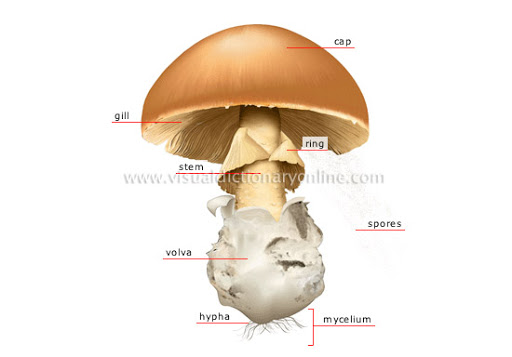

In [1]:
from PIL import Image
im = Image.open('C:\\Users\\flowe\\OneDrive - San Francisco State University\\Data Warehouse\\UCI mushrooms\\mushrooms.jpg')
im

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.datasets import load_iris

from sklearn.preprocessing import Binarizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [3]:
# mushroom은 어떤 데이터 인가
mush_df = pd.read_csv('C:\\Users\\flowe\\OneDrive - San Francisco State University\\Data Warehouse\\UCI mushrooms\\datasets_478_974_mushrooms.csv')
print("Data distribution : \n", mush_df.groupby('class')['habitat'].count())

Data distribution : 
 class
e    4208
p    3916
Name: habitat, dtype: int64


In [4]:
# 데이터 전처리 전 mushrooms data
count = 0
for col in mush_df.columns:
    print("#{0} {1:25}\t {2}".format(count, col, np.unique(mush_df[col])))
    count += 1

#0 class                    	 ['e' 'p']
#1 cap-shape                	 ['b' 'c' 'f' 'k' 's' 'x']
#2 cap-surface              	 ['f' 'g' 's' 'y']
#3 cap-color                	 ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
#4 bruises                  	 ['f' 't']
#5 odor                     	 ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
#6 gill-attachment          	 ['a' 'f']
#7 gill-spacing             	 ['c' 'w']
#8 gill-size                	 ['b' 'n']
#9 gill-color               	 ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
#10 stalk-shape              	 ['e' 't']
#11 stalk-root               	 ['?' 'b' 'c' 'e' 'r']
#12 stalk-surface-above-ring 	 ['f' 'k' 's' 'y']
#13 stalk-surface-below-ring 	 ['f' 'k' 's' 'y']
#14 stalk-color-above-ring   	 ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
#15 stalk-color-below-ring   	 ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
#16 veil-type                	 ['p']
#17 veil-color               	 ['n' 'o' 'w' 'y']
#18 ring-number              	 ['n' 'o' 't']
#19 ring-type  

In [5]:
# missing 모조리 드랍할 경우에는 아래 진행
'''
# missing drop
mush_df = mush_df[mush_df['stalk-root'] != '?']

# rows를 drop했으면 ML을 위해 순차적으로 index를 reset해준다.
mush_df.reset_index(drop=True, inplace = True)
mush_df.info()
'''

"\n# missing drop\nmush_df = mush_df[mush_df['stalk-root'] != '?']\n\n# rows를 drop했으면 ML을 위해 순차적으로 index를 reset해준다.\nmush_df.reset_index(drop=True, inplace = True)\nmush_df.info()\n"

In [6]:
# 대부분의 칼럼이 범주형이기에 one-hot encoding 실시
mush_df = pd.get_dummies(mush_df)
# 먹을 수 있거나 독이 있거나 둘 중 하나기에 poison 정보 드랍
mush_df.drop('class_p', axis = 1, inplace = True)

In [7]:
# 데이터 전처리 후 mushrooms data
count = 0
for col in mush_df.columns:
    print("#{0} {1:15} \t {2}".format(count, col, np.unique(mush_df[col])))
    count += 1

#0 class_e         	 [0 1]
#1 cap-shape_b     	 [0 1]
#2 cap-shape_c     	 [0 1]
#3 cap-shape_f     	 [0 1]
#4 cap-shape_k     	 [0 1]
#5 cap-shape_s     	 [0 1]
#6 cap-shape_x     	 [0 1]
#7 cap-surface_f   	 [0 1]
#8 cap-surface_g   	 [0 1]
#9 cap-surface_s   	 [0 1]
#10 cap-surface_y   	 [0 1]
#11 cap-color_b     	 [0 1]
#12 cap-color_c     	 [0 1]
#13 cap-color_e     	 [0 1]
#14 cap-color_g     	 [0 1]
#15 cap-color_n     	 [0 1]
#16 cap-color_p     	 [0 1]
#17 cap-color_r     	 [0 1]
#18 cap-color_u     	 [0 1]
#19 cap-color_w     	 [0 1]
#20 cap-color_y     	 [0 1]
#21 bruises_f       	 [0 1]
#22 bruises_t       	 [0 1]
#23 odor_a          	 [0 1]
#24 odor_c          	 [0 1]
#25 odor_f          	 [0 1]
#26 odor_l          	 [0 1]
#27 odor_m          	 [0 1]
#28 odor_n          	 [0 1]
#29 odor_p          	 [0 1]
#30 odor_s          	 [0 1]
#31 odor_y          	 [0 1]
#32 gill-attachment_a 	 [0 1]
#33 gill-attachment_f 	 [0 1]
#34 gill-spacing_c  	 [0 1]
#35 gill-spacing_w  	 [0 1

In [8]:
# 첫 번째 컬럼(edible) 추출하여 target으로 저장
mush_target = mush_df.iloc[:, 0] 

# 첫 번째 컬럼만 빼고 추출하여 data로 저장
# mush_data = mush_df.iloc[:, 1:]

# 냄새로만 찾아보기
mush_data = mush_df.iloc[:, mush_df.columns.str.contains('odor')]

### Comparison between Classification and Regression

* 학습 데이터와 테스트 데이터 세트로 분리

In [9]:
X_train, X_test, y_train, y_test = train_test_split(mush_data, mush_target, test_size = 0.2, random_state = 11)

In [10]:
# 결정나무, random forest, 로지스틱 회귀를 위한 사이킷런 classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print("DecisionTreeClassification 정확도 : {0}".format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf = rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassification 정확도 : {0}".format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf = lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("Logisticregression 정확도 : {0}".format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassification 정확도 : 0.9827692307692307
RandomForestClassification 정확도 : 0.9827692307692307
Logisticregression 정확도 : 0.9827692307692307


### Featrue importance

Text(0.5, 1.0, 'Feature Importances')

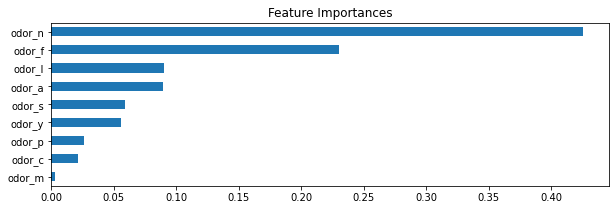

In [11]:
fig = plt.figure(figsize=(10,3))
X = pd.DataFrame(X_train) # X_train을 dataframe으로 바꿔줘야함. columns attribute를 쓰기 위해
importance = pd.Series(rf_clf.feature_importances_,index = X.columns)
importance.sort_values().plot.barh()
plt.title('Feature Importances')

### 교차 검증

** K Fold **

In [12]:
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = []
# mush_data를 dataframe to ndarray
mush_data = mush_data.values

n_iter = 0

for train_index, test_index in kfold.split(mush_data):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    y_train, y_test = mush_target[train_index], mush_target[test_index]
    X_train, X_test = mush_data[train_index], mush_data[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    # 반복할 때 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))

    cv_accuracy.append(accuracy)

# 평균 kfold 정확도
print("\n## 교차 검증별 정확도:", cv_accuracy)
print("## 평균 검증 정확도:", np.mean(cv_accuracy))



#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 6499, 검증 데이터 크기: 1625
#1 검증 세트 인덱스:[   0    1    2 ... 1622 1623 1624]

#2 교차 검증 정확도 :1.0, 학습 데이터 크기: 6499, 검증 데이터 크기: 1625
#2 검증 세트 인덱스:[1625 1626 1627 ... 3247 3248 3249]

#3 교차 검증 정확도 :0.9938, 학습 데이터 크기: 6499, 검증 데이터 크기: 1625
#3 검증 세트 인덱스:[3250 3251 3252 ... 4872 4873 4874]

#4 교차 검증 정확도 :0.9372, 학습 데이터 크기: 6499, 검증 데이터 크기: 1625
#4 검증 세트 인덱스:[4875 4876 4877 ... 6497 6498 6499]

#5 교차 검증 정확도 :0.9951, 학습 데이터 크기: 6500, 검증 데이터 크기: 1624
#5 검증 세트 인덱스:[6500 6501 6502 ... 8121 8122 8123]

## 교차 검증별 정확도: [1.0, 1.0, 0.9938, 0.9372, 0.9951]
## 평균 검증 정확도: 0.98522


** Stratified K fold **


In [13]:
# Stratified K fold로 정확도 측정
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy =[]

for train_index, test_index in skfold.split(mush_df, mush_target):
    # split으로 반환된 인덱스로 학습, 검증 데이터 추출
    X_train, X_test = mush_data[train_index], mush_data[test_index]
    y_train, y_test = mush_target[train_index], mush_target[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.9978, 학습 데이터 크기: 5416, 검증 데이터 크기: 2708
#1 검증 세트 인덱스:[   0    1    2 ... 4706 4707 4708]

#2 교차 검증 정확도 :0.9609, 학습 데이터 크기: 5416, 검증 데이터 크기: 2708
#2 검증 세트 인덱스:[1593 1594 1595 ... 6300 6301 6302]

#3 교차 검증 정확도 :0.997, 학습 데이터 크기: 5416, 검증 데이터 크기: 2708
#3 검증 세트 인덱스:[3142 3143 3144 ... 8121 8122 8123]

## 교차 검증별 정확도: [0.9978 0.9609 0.997 ]
## 평균 검증 정확도: 0.9852333333333333


### 교차검증을 보다 간편하게

* cross_val_score()

In [14]:
# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(estimator = dt_clf, X = mush_data, y = mush_target, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.9978 0.9609 0.997 ]
평균 검증 정확도 :  0.9852


### 교차검증과 최적 하이퍼 파라미터 튜닝을 한 번에
* GridSearchCV

In [15]:
# 테스트 셋과 학습 셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(mush_data, mush_target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# parameter들을 dictionary 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split' : [2, 3]}

In [16]:
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True, return_train_score = True)

# 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과는 cv_results_ 라는 딕셔너리로 저장됨. 이를 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.885521,5,0.882787,0.891043,0.882733
1,"{'max_depth': 1, 'min_samples_split': 3}",0.885521,5,0.882787,0.891043,0.882733
2,"{'max_depth': 2, 'min_samples_split': 2}",0.937067,3,0.935856,0.939520,0.935826
3,"{'max_depth': 2, 'min_samples_split': 3}",0.937067,3,0.935856,0.939520,0.935826
4,"{'max_depth': 3, 'min_samples_split': 2}",0.985228,1,0.988925,0.982918,0.983841
5,"{'max_depth': 3, 'min_samples_split': 3}",0.985228,1,0.988925,0.982918,0.983841


In [17]:
print('GridSearchCV 최적 estimator:', grid_dtree.best_estimator_)
print('GridSearchCV 최적 인덱스:', grid_dtree.best_index_)
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:', grid_dtree.best_score_)

GridSearchCV 최적 estimator: DecisionTreeClassifier(max_depth=3)
GridSearchCV 최적 인덱스: 4
GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9852279278576788


In [18]:
# 최적 에스티메이터로 refit
estimator = grid_dtree.best_estimator_

# refit=True로 설정된 GridSearchCV 객체가 fit()을 수행 시 학습이 완료된 Estimator를 내포하고 있으므로 predict()를 통해 예측도 가능. 
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도 : 0.9852


## 정확도

* 정밀도 TP / (FP + TP) // 정확히 맞췄을 때 True일 확률

* 재현율 TP / (FN + TP) // 실제가 True일때 맞췄을 확률

In [19]:
# 오차행렬, 정확도, 정밀도, 재현율 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    arruracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall,f1, roc_auc))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(mush_data, mush_target, test_size = 0.3, random_state = 112)

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


오차 행렬
[[1116   40]
 [   0 1282]]
정확도: 0.9970, 정밀도: 0.9697, 재현율: 1.0000, F1:0.9846, AUC:0.9827


### Precision / Recall Trade-off

In [21]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])
print("\n")
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (2438, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.03510255 0.96489745]
 [0.03510255 0.96489745]
 [0.03510255 0.96489745]]


두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.03510255 0.96489745 1.        ]
 [0.03510255 0.96489745 1.        ]
 [0.03510255 0.96489745 1.        ]]


In [22]:
#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.9 # 0.9의 확률로 확신하지 않으면 먹는 것으로 분류하지 않는다.

# predict_proba( ) 반환값의 두번째 컬럼 [:,1] , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) # Binarizer에 들어가는 리스트는 2차원이 돼야함.
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[1116   40]
 [   0 1282]]
정확도: 0.9970, 정밀도: 0.9697, 재현율: 1.0000, F1:0.9846, AUC:0.9827


In [23]:
# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])
print()

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))
print()

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (3,)
반환된 precisions 배열의 Shape: (4,)
반환된 recalls 배열의 Shape: (4,)
thresholds 5 sample: [0.96489745 0.98026565 0.98088699]
precisions 5 sample: [0.96974281 1.         1.         1.        ]
recalls 5 sample: [1.         0.16926677 0.08034321 0.        ]

샘플 추출을 위한 임계값 배열의 index 10개: [0]
샘플용 10개의 임곗값:  [0.96]

샘플 임계값별 정밀도:  [0.97]
샘플 임계값별 재현율:  [1.]


** 임곗값의 변경에 따른 정밀도-재현율 변화 곡선을 그림 **

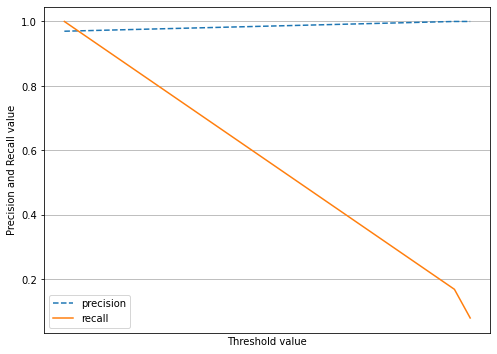

In [24]:
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


### F1 score

In [25]:
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.9846


### ROC Curve와 AUC

In [26]:
# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [0 5]
샘플용 10개의 임곗값:  [1.98 0.02]
샘플 임곗값별 FPR:  [0.    0.099]
샘플 임곗값별 TPR:  [0. 1.]


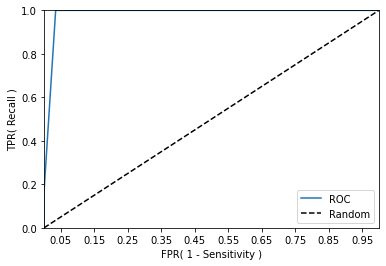

In [27]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


** Decision Tree **

In [28]:
# DF로 다시 불러오기
mush_data = mush_df.iloc[:, mush_df.columns.str.contains('odor')]

In [29]:
export_graphviz(dt_clf, out_file='tree.dot', class_names='class_e', feature_names=mush_data.columns, impurity = True, filled = True)

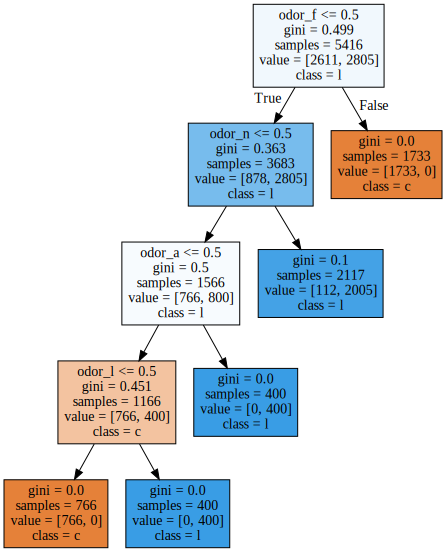

In [30]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 식용 1, 독성 0